In [4]:
%matplotlib inline

In [5]:
import requests
import re

Star_filter = ['One_star', 'Two_star', 'Three_star', 'Four_star', 'Five_star'];

def RE_search(pattern, source):
    match = pattern.search(source)
    return match
    
def RE_findall(pattern, source):
    match = pattern.search(source)
    return match

def get_info_of_reviews(asin,star):
    TitlePage = re.compile(r'<title>(.+?)</title>')
    TotalRevN = re.compile(r'totalReviewCount">(.+?)</span>')
    AveRating = re.compile(r'rating-out-of-text">(.+?) out of 5 stars</span>')
    HelpVotes = re.compile(r'review-votes">(.+?) of (.+?) people found the following')
    ReviewText = re.compile(r'review-text">(.+?)</span>')
    ReviewsWithVotes = re.compile(r'review-votes">(.+?) of (.+?) people found the following.+review-text">(.+?)</span>')

    url0 = 'http://www.amazon.com/product-reviews/{asin}'.format(asin=asin)
    print url0
    html0 = requests.get(url0).text
    # title = TitlePage.search(html0).group(1);
    title = RE_search(TitlePage, html0).group(1);
    print title
    n1 = int(TotalRevN.search(html0).group(1).replace(',',''));
    n2 = AveRating.search(html0).group(1);
    print 'Total review number = %s' % n1
    print 'Average rating = %s' % n2
    
    print 'For top ten %s star reviews:' % star
    url_star = 'http://www.amazon.com/product-reviews/{asin}/ref=cm_cr_pr_viewopt_sr?sortBy=helpful&reviewerType=all_reviews&formatType=all_formats&filterByStar={Stars}&pageNumber=1'
    url = url_star.format(asin = asin, Stars = Star_filter[star-1])
    html = requests.get(url).text
    AllRatings = HelpVotes.findall(html)

    n_help = []
    n_voted = []
    for t in AllRatings:
        n_help.append(int(t[0].encode('ascii', 'ignore')))
        n_voted.append(int(t[1].encode('ascii', 'ignore')))
    print n_help[2:len(n_help)]
    print n_voted[2:len(n_help)]
    # print reviewers
    AllReviews = ReviewText.findall(html)
    n_words = []
    for txt in AllReviews:
        n = len(txt.split())
        n_words.append(n)
    print n_words
    
    print 'stats of reviews with votes:'
    n_help_RWV = []
    n_voted_RWV = []
    n_words_RWV = []
    RevWithVotes = ReviewsWithVotes.findall(html)
    for t in RevWithVotes:
        n_help_RWV.append(int(t[0].encode('ascii', 'ignore')))
        n_voted_RWV.append(int(t[1].encode('ascii', 'ignore')))
        n_words_RWV.append(len(t[2].split()))
    print n_help_RWV
    print n_voted_RWV
    print n_words_RWV
    
    return n_help_RWV, n_voted_RWV, n_words_RWV
    
star = 5;   
a_5_n_help, a_5_n_voted, a_5_n_words = get_info_of_reviews('B00ABKGG0C',5)
#print a_5_n_help, a_5_n_voted, a_5_n_words
star = 1;   
a_1_n_help, a_1_n_voted, a_1_n_words = get_info_of_reviews('B00ABKGG0C',1)

star = 5;   
b_5_n_help, b_5_n_voted, b_5_n_words = get_info_of_reviews('0425265633',5)
star = 1;   
b_1_n_help, b_1_n_voted, b_1_n_words = get_info_of_reviews('0425265633',1)

http://www.amazon.com/product-reviews/B00ABKGG0C
Amazon.com: Customer Reviews: Blood Song (A Raven&#039;s Shadow Novel, Book 1)
Total review number = 2098
Average rating = 4.8
For top ten 5 star reviews:
[375, 167, 60, 14, 29, 62, 10, 7, 20, 4]
[418, 187, 66, 14, 33, 75, 10, 8, 26, 4]
[417, 359, 840, 604, 197, 54, 539, 332, 146, 32]
stats of reviews with votes:
[375, 167, 14, 29, 62, 10, 7, 20, 4]
[418, 187, 14, 33, 75, 10, 8, 26, 4]
[417, 359, 604, 197, 54, 539, 332, 146, 32]
http://www.amazon.com/product-reviews/B00ABKGG0C
Amazon.com: Customer Reviews: Blood Song (A Raven&#039;s Shadow Novel, Book 1)
Total review number = 2098
Average rating = 4.8
For top ten 1 star reviews:
[3, 61, 27, 3, 4, 3, 2]
[16, 171, 84, 38, 56, 80, 161]
[179, 263, 179, 28, 21, 37, 48]
stats of reviews with votes:
[3, 61, 27, 3, 4, 3, 2]
[16, 171, 84, 38, 56, 80, 161]
[179, 263, 179, 28, 21, 37, 48]
http://www.amazon.com/product-reviews/0425265633
Amazon.com: Customer Reviews: Tower Lord (A Raven&#039;s Shado

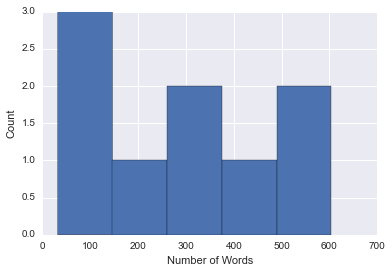

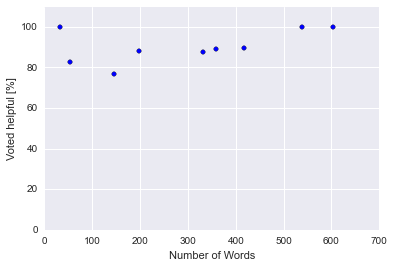

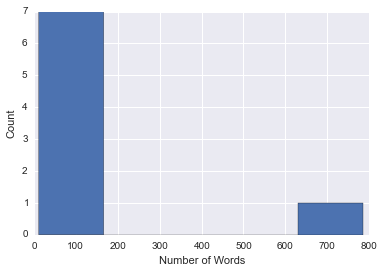

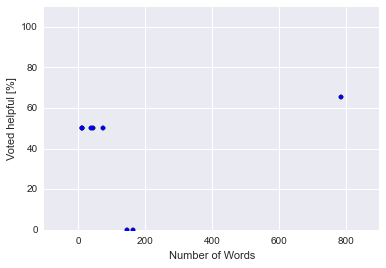

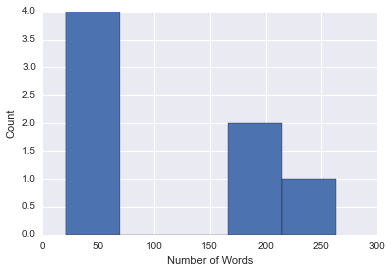

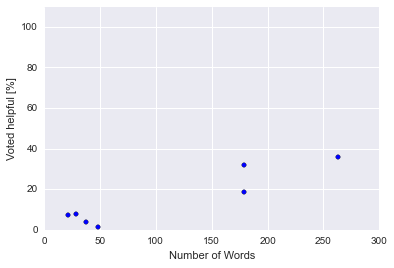

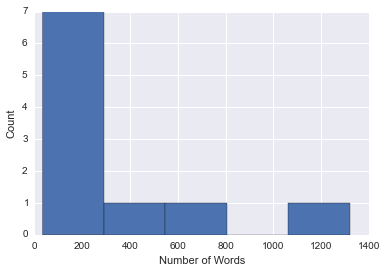

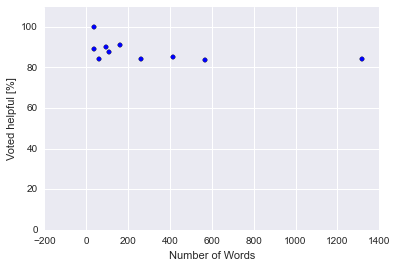

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

a_5_r_help = [100.*x/y for x,y in zip(a_5_n_help, a_5_n_voted)]
b_5_r_help = [100.*x/y for x,y in zip(b_5_n_help, b_5_n_voted)]
a_1_r_help = [100.*x/y for x,y in zip(a_1_n_help, a_1_n_voted)]
b_1_r_help = [100.*x/y for x,y in zip(b_1_n_help, b_1_n_voted)]

plt.hist(a_5_n_words, bins=5)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()
plt.scatter(a_5_n_words, a_5_r_help)
plt.xlabel('Number of Words')
plt.ylabel('Voted helpful [%]')
plt.ylim(0,110)
plt.show()

plt.hist(b_5_n_words, bins=5)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()
plt.scatter(b_5_n_words, b_5_r_help)
plt.xlabel('Number of Words')
plt.ylabel('Voted helpful [%]')
plt.ylim(0,110)
plt.show()

plt.hist(a_1_n_words, bins=5)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()
plt.scatter(a_1_n_words, a_1_r_help)
plt.xlabel('Number of Words')
plt.ylabel('Voted helpful [%]')
plt.ylim(0,110)
plt.show()

plt.hist(b_1_n_words, bins=5)
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.show()
plt.scatter(b_1_n_words, b_1_r_help)
plt.xlabel('Number of Words')
plt.ylabel('Voted helpful [%]')
plt.ylim(0,110)
plt.show()